In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv('datasets/Support_Vector_machine_Iphone_sale_data.csv')
data[0:10]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [3]:
data.shape

(400, 3)

In [4]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
X = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train[0:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred.shape

(100,)

In [9]:
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred.round(decimals = 2)).flatten(),
})

#results = pd.DataFrame(results)
results[0:20]

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


In [10]:
results.Predicted.value_counts()

0    67
1    33
Name: Predicted, dtype: int64

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)

[[64  4]
 [ 3 29]]
Accuracy score: 0.93
Precision score: 0.8787878787878788


In [12]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


<IPython.core.display.Javascript object>


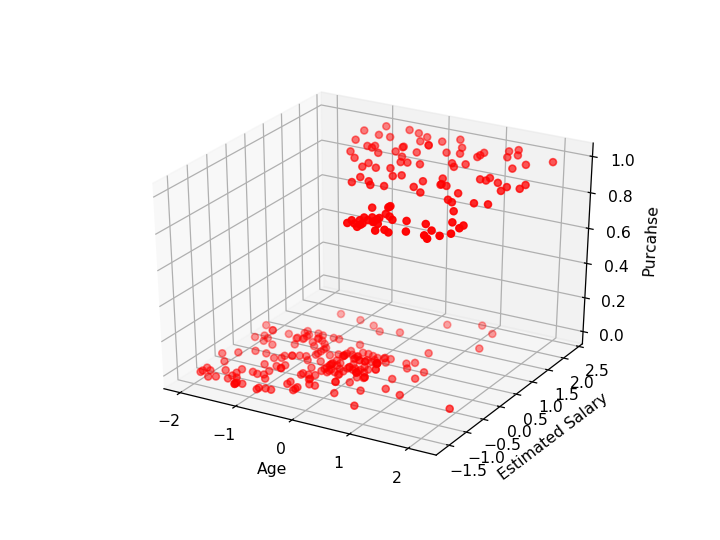

Text(0.5, 0, 'Purcahse')

In [15]:
# we need the below library to create 3d plots in python
from mpl_toolkits import mplot3d
# first we create a matplotlib figure and add a 3D subplot of the
# above mentioned library on the matplotlib figure
ax = plt.figure().add_subplot(projection = '3d')
# function to create a 3d scatter plot
ax.scatter3D(X_train[:,0],X_train[:,1],y_train, c = 'red')
# adding the prediction line the plot
#ax.plot3D(X_train[:,0],X_train[:,1],clf.predict(X_train), c = 'blue')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_zlabel('Purcahse')